In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


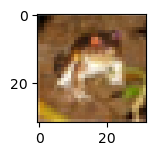

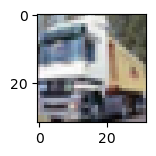

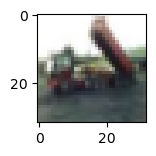

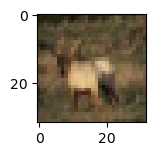

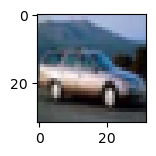

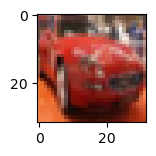

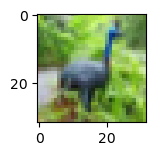

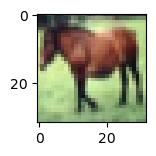

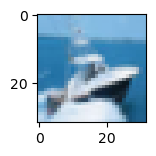

In [4]:
for i in range(9):
    plt.subplot(3,3,i + 1)
    plt.imshow(x_train[i])
    plt.show()

In [5]:
x_train = x_train[:5000,:,:]
x_test = x_test[:1000,:,:]
y_train = y_train[:5000]
y_test = y_test[:1000]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 32, 32, 3)
(1000, 32, 32, 3)
(5000, 1)
(1000, 1)


In [6]:
#### Normalization
x_train = x_train/255
x_test = x_test/255

#### Reshaping

x_train = x_train.reshape(5000,32,32,3)
x_test = x_test.reshape(1000,32,32,3)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 32, 32, 3)
(1000, 32, 32, 3)
(5000, 1)
(1000, 1)


In [7]:
print(y_train[:5])

[[6]
 [9]
 [9]
 [4]
 [1]]


In [8]:
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential

In [9]:
m1=Sequential()
m1.add(Conv2D(128, (3, 3), activation='relu' ,input_shape=(32, 32, 3)))
m1.add(MaxPooling2D((2, 2)))
m1.add(Conv2D(64,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))
m1.add(Flatten())
m1.add(Dense(128, activation='relu'))
m1.add(Dense(10, activation='softmax'))
m1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])

In [10]:
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
157/157 [==============================] - 19s 107ms/step - loss: 2.0113 - acc: 0.2548 - val_loss: 1.9280 - val_acc: 0.2580
Epoch 2/20
157/157 [==============================] - 17s 106ms/step - loss: 1.6768 - acc: 0.3908 - val_loss: 1.7740 - val_acc: 0.3520
Epoch 3/20
157/157 [==============================] - 16s 104ms/step - loss: 1.5062 - acc: 0.4592 - val_loss: 1.4732 - val_acc: 0.4570
Epoch 4/20
157/157 [==============================] - 17s 107ms/step - loss: 1.3763 - acc: 0.5126 - val_loss: 1.4064 - val_acc: 0.4750
Epoch 5/20
157/157 [==============================] - 16s 104ms/step - loss: 1.2891 - acc: 0.5428 - val_loss: 1.3857 - val_acc: 0.4890
Epoch 6/20
157/157 [==============================] - 17s 106ms/step - loss: 1.1939 - acc: 0.5802 - val_loss: 1.3540 - val_acc: 0.5390
Epoch 7/20
157/157 [==============================] - 16s 104ms/step - loss: 1.1208 - acc: 0.6044 - val_loss: 1.3041 - val_acc: 0.5330
Epoch 8/20
157/157 [==============================] - 1

In [11]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()


,loss,acc,val_loss,val_acc,Epochs
15,0.413076,0.8610,1.724177,0.544,15
16,0.349764,0.8824,1.737910,0.550,16
17,0.280947,0.9092,1.935730,0.528,17
18,0.247563,0.9230,2.160195,0.503,18
19,0.193689,0.9438,2.201900,0.533,19


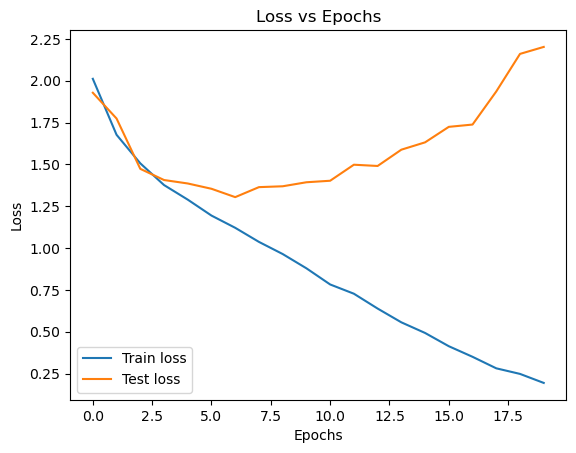

In [12]:
plt.plot(r1['Epochs'],r1['loss'],label='Train loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Test loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

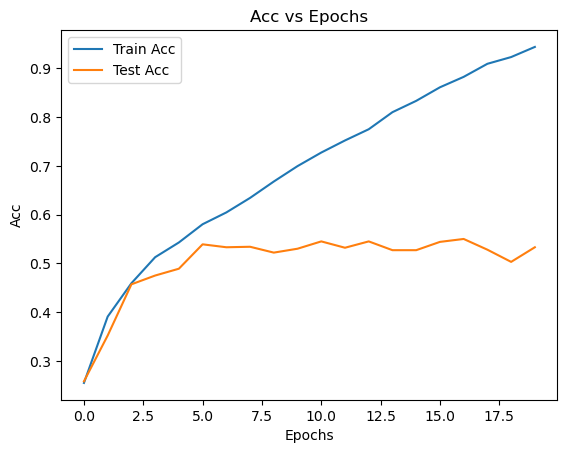

In [13]:
plt.plot(r1['Epochs'],r1['acc'],label='Train Acc')
plt.plot(r1['Epochs'],r1['val_acc'],label='Test Acc')
plt.title('Acc vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [14]:
ypred_m1 = m1.predict(x_test)
ypred_m1[:10]

32/32 [==============================] - 1s 25ms/step


array([[9.40964242e-07, 5.33396838e-09, 1.25505477e-01, 8.35043132e-01,
        1.37326118e-04, 3.15118358e-02, 5.61448047e-03, 4.97099052e-07,
        2.17593065e-03, 1.03645207e-05],
       [2.67596403e-03, 1.68084411e-03, 7.58180532e-11, 4.48725848e-11,
        5.66908066e-12, 1.21424093e-10, 5.16952543e-14, 1.07780646e-12,
        9.95637953e-01, 5.21929724e-06],
       [1.54611154e-03, 4.03872924e-04, 9.56529220e-06, 1.66829941e-05,
        1.73825515e-06, 2.09797622e-06, 3.22811076e-07, 7.34417860e-09,
        9.97828782e-01, 1.90760402e-04],
       [7.03654826e-01, 5.29792669e-05, 3.13774603e-06, 1.89459151e-08,
        4.09435152e-08, 1.97812877e-08, 1.17436386e-07, 1.25657440e-08,
        2.96271622e-01, 1.72851269e-05],
       [4.42768433e-10, 9.26421490e-06, 1.25488412e-04, 3.70734110e-02,
        2.43756101e-01, 9.80872009e-03, 7.09217846e-01, 7.96769746e-06,
        1.27732983e-06, 3.64345665e-09],
       [7.93220636e-08, 8.63453309e-09, 4.71713975e-06, 5.45860152e-04,
   

In [15]:
ypred = [np.argmax(i) for i in ypred_m1]
print(ypred[:10])

[3, 8, 8, 0, 6, 6, 9, 6, 5, 1]


In [16]:
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
cm = confusion_matrix(y_test,ypred)
print(cm)
print(classification_report(y_test,ypred))

[[49  3  7  2  3  5  5  5 16  8]
 [ 2 61  3  0  1  1  2  0  6 13]
 [ 7  3 43  9 10  9 13  3  2  1]
 [ 5  0  5 30  9 19 19 10  0  6]
 [ 4  1 10  8 32  5 13 13  1  3]
 [ 0  0  9 17  5 25 11 17  1  1]
 [ 0  3  7  7  3  3 84  2  0  3]
 [ 2  0  3  6  7  9  2 69  2  2]
 [11  7  3  2  1  5  2  0 69  6]
 [ 2 12  2  2  1  2  5  6  6 71]]
              precision    recall  f1-score   support

           0       0.60      0.48      0.53       103
           1       0.68      0.69      0.68        89
           2       0.47      0.43      0.45       100
           3       0.36      0.29      0.32       103
           4       0.44      0.36      0.40        90
           5       0.30      0.29      0.30        86
           6       0.54      0.75      0.63       112
           7       0.55      0.68      0.61       102
           8       0.67      0.65      0.66       106
           9       0.62      0.65      0.64       109

    accuracy                           0.53      1000
   macro avg       